Import Necessary Modules

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt



Display image

In [ ]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(5, 5, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

cifar-10 dataset

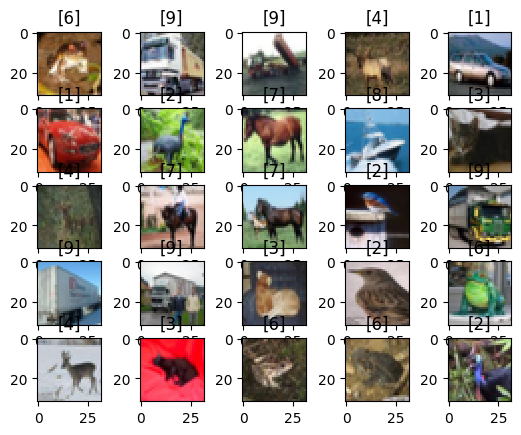

trainX shape: (50000, 32, 32, 3, 1), trainY shape: (50000, 10)
test shape: (10000, 32, 32, 3, 1), testY shape: (10000, 10)


In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
display_img(trainX[:25], trainY[:25])

trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

trainY = to_categorical(trainY, 10)  # 10 classes in CIFAR-10
testY = to_categorical(testY, 10)

print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
print(f"test shape: {testX.shape}, testY shape: {testY.shape}")


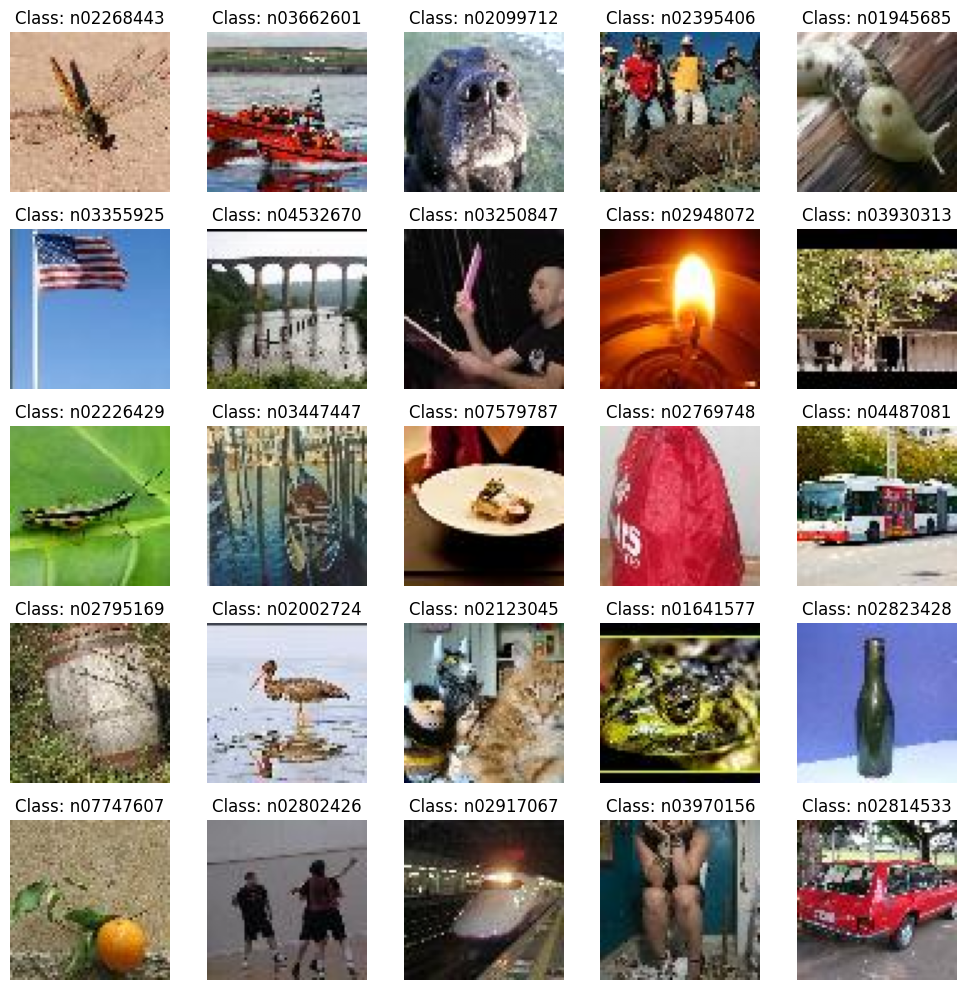

In [ ]:
fimport os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the Tiny ImageNet dataset (adjust the path as needed)
tiny_imagenet_path = "tiny_imagenet/tiny-imagenet-200/train/"

# Get the list of all class directories
classes = os.listdir(tiny_imagenet_path)

# Function to plot images
def plot_tiny_imagenet_images(num_images=25):
    """
    Plots `num_images` random images from the Tiny ImageNet training dataset.
    """
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # Plot a 3x3 grid
    axes = axes.ravel()  # Flatten the axes for easy iteration

    for i in range(num_images):
        # Randomly choose a class and an image
        random_class = classes[i % len(classes)]  # Cycle through classes
        class_path = os.path.join(tiny_imagenet_path, random_class, "images")
        image_files = os.listdir(class_path)
        random_image = image_files[0]  # Select the first image

        # Load and display the image
        image_path = os.path.join(class_path, random_image)
        img = load_img(image_path, target_size=(64, 64))  # Tiny ImageNet images are 64x64
        img_array = img_to_array(img)

        axes[i].imshow(img_array.astype("uint8") / 255.0)  # Normalize for display
        axes[i].set_title(f"Class: {random_class}")
        axes[i].axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()

# Call the function to display images
plot_tiny_imagenet_images()


Model Create

In [ ]:
mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)

for layer in mobilenet_model.layers:
  layer.trainable = False


inputs = mobilenet_model.input
x = mobilenet_model.output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)


model = Model(inputs,outputs, name='MobileNetModel')
model.summary(show_trainable=True)

for layer in mobilenet_model.layers[-2:]:
  layer.trainable = True

<ipython-input-6-ca3e21636c11>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)


Model: "MobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_1 (InputLayer)          │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 16, 16, 32)           │           864 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1_bn (BatchNormalization)       │ (None, 16, 16, 32)           │           128 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1_relu (ReLU)                   │ (None, 16, 16, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1 (DepthwiseConv2D)         │ (None, 16, 16, 32)           │           288 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1_bn (BatchNormalization)   │ (None, 16, 16, 32)           │           128 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1_relu (ReLU)               │ (None, 16, 16, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1 (Conv2D)                  │ (None, 16, 16, 64)           │         2,048 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1_bn (BatchNormalization)   │ (None, 16, 16, 64)           │           256 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1_relu (ReLU)               │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pad_2 (ZeroPadding2D)          │ (None, 17, 17, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2 (DepthwiseConv2D)         │ (None, 8, 8, 64)             │           576 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2_bn (BatchNormalization)   │ (None, 8, 8, 64)             │           256 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2_relu (ReLU)               │ (None, 8, 8, 64)             │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2 (Conv2D)                  │ (None, 8, 8, 128)            │         8,192 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2_bn (BatchNormalization)   │ (None, 8, 8, 128)            │           512 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2_relu (ReLU)               │ (None, 8, 8, 128)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3 (DepthwiseConv2D)         │ (None, 8, 8, 128)            │         1,152 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3_bn (BatchNormalization)   │ (None, 8, 8, 128)            │           512 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3_relu (ReLU)

 Total params: 3,493,834 (13.33 MB)

 Trainable params: 264,970 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Train

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, validation_split= 0.1, epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.4699 - loss: 1.5823 - val_accuracy: 0.5864 - val_loss: 1.2405
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.6057 - loss: 1.1420 - val_accuracy: 0.5806 - val_loss: 1.2469
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6564 - loss: 1.0017 - val_accuracy: 0.5974 - val_loss: 1.2910
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.6924 - loss: 0.8894 - val_accuracy: 0.5954 - val_loss: 1.3090
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.7222 - loss: 0.8050 - val_accuracy: 0.5954 - val_loss: 1.4219
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7438 - loss: 0.7369 - val_accuracy: 0.5758 - val_loss: 1.5921
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7717 - loss: 0.6739 - val_accuracy: 0.5872 - val_loss: 1.7536
Epoch 8/10


Evaluate Performance

In [ ]:
# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)


print('FCNN Model')
print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.5599 - loss: 2.0188
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
FCNN Model
OriginalY   PredictedY
=========   ==========
3 		 4
8 		 8
8 		 8
0 		 0
6 		 6
6 		 6
1 		 1
6 		 6
3 		 3
1 		 8
